# Linear Regression with Dummy Variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Pratik-Bhujade/Diamond-Dataset/master/DiamondData.csv')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,10352.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,2274.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,8779.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,1590.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,11757.0,8.27,8.39,4.91


In [3]:
print(df.shape)
df.dtypes

(50000, 10)


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [4]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,50000.000000,50000,50000,50000,49529.000000,49610.000000,49747.000000,49779.000000,49667.000000,49572.000000
unique,NaN,6,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19918,10493,12120,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.906952,NaN,NaN,NaN,61.748402,57.464787,3938.803486,5.731776,5.733675,3.539514
std,2.069722,NaN,NaN,NaN,1.429476,2.242345,3994.643235,1.122125,1.119993,0.706533
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,5339.000000,6.540000,6.540000,4.040000


In [5]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      471
table      390
price      253
x          221
y          333
z          428
dtype: int64

In [6]:
df.dropna(inplace=True)

### Categorical Variables

In [7]:
X_catg = df.select_dtypes(include=["object"])
X_catg["cut"].replace(["Very Geod"], "Very Good", inplace=True)

/Users/louisdeschuttere/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


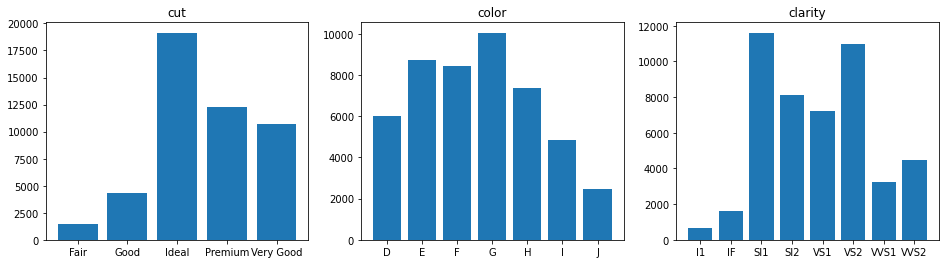

In [8]:
fig, axes = plt.subplots(1, X_catg.shape[1], 
                        figsize=(16,4))
ax = axes.ravel()

for i in range(X_catg.shape[1]):
    labels, counts = np.unique(X_catg.iloc[:,i], 
                               return_counts=True)
    ax[i].bar(labels, counts, align='center')
    ax[i].set_title(X_catg.columns[i])
    
plt.show()

### Continuous Variables

In [9]:
X_cont = df.select_dtypes(include=["float64"])

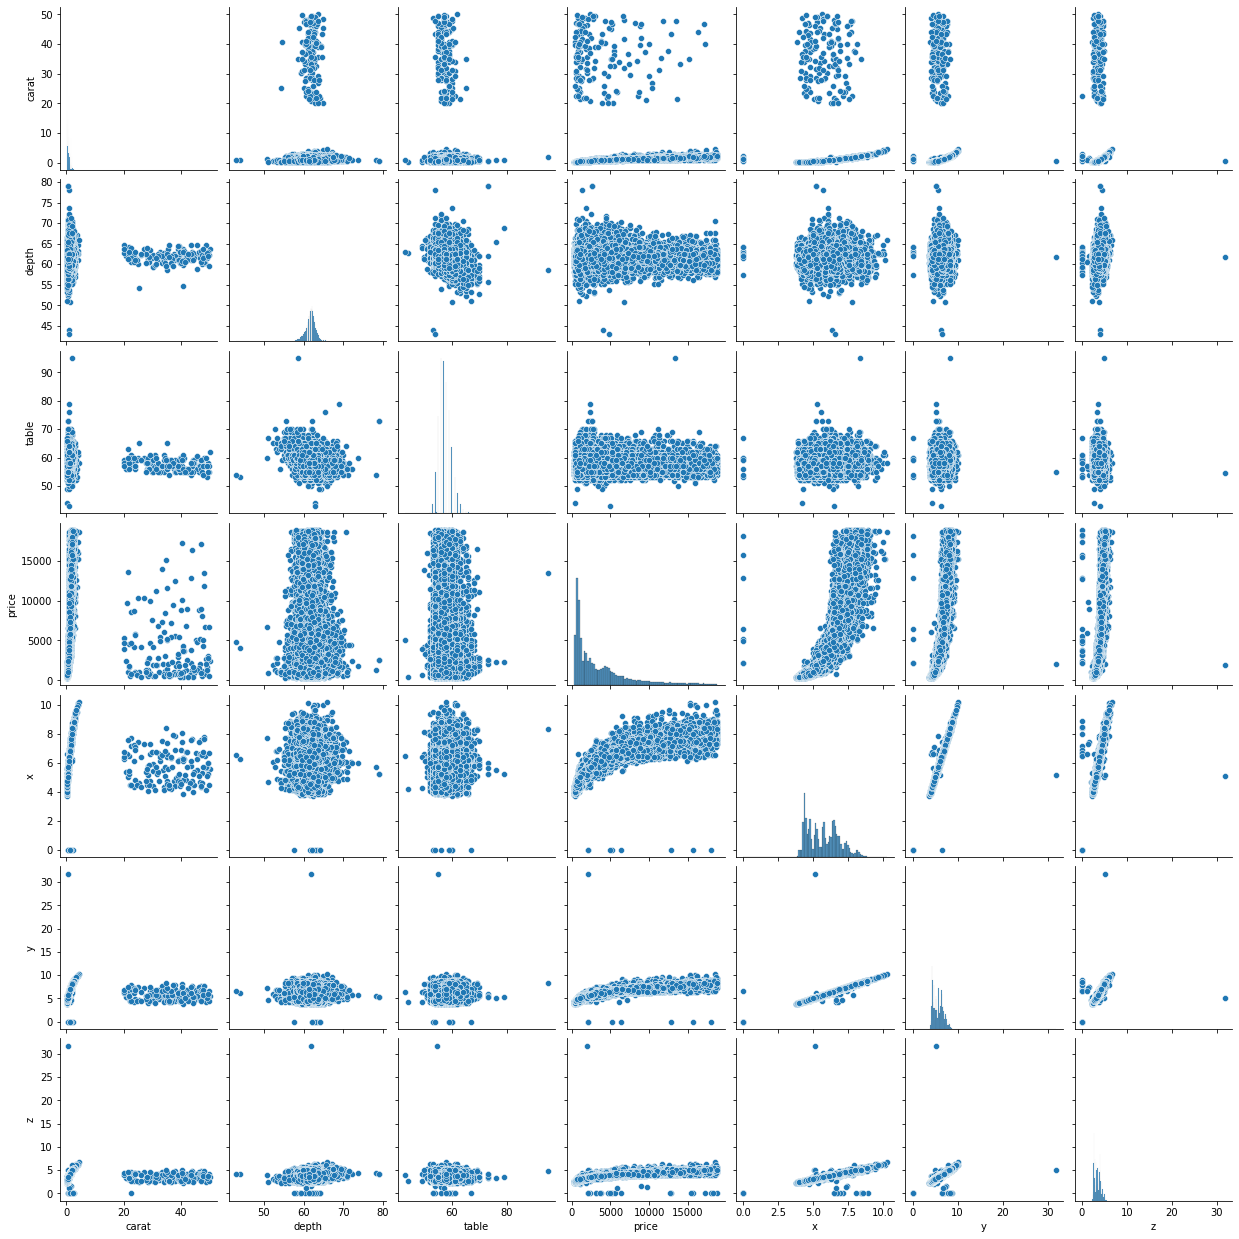

In [10]:
import seaborn as sns
_ = sns.pairplot(X_cont)

## Regression Model

In [11]:
X = df[["carat", "cut", "color", "clarity", "depth", "table"]]
X = pd.get_dummies(data=X, drop_first=True)
y = df["price"]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38352, 21)
(9588, 21)
(38352,)
(9588,)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# print the intercept
print(model.intercept_)

-10178.130073533473


In [15]:
coeff_parameter = pd.DataFrame(model.coef_,
                               X.columns,
                               columns=['Coefficient'])
coeff_parameter

,Coefficient
carat,352.512459
depth,41.390291
table,167.571411
cut_Good,1.471173
cut_Ideal,266.874505
cut_Premium,618.451602
cut_Very Geod,383.264636
cut_Very Good,264.448337
color_E,-11.702353
color_F,625.395537
